In [73]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

### T분포

In [8]:
t = 1.53
df = 5  #자유도

prob = stats.t.cdf(t,df)
print('P(T<=t):{:.3f}'.format(prob))

P(T<=t):0.907


In [10]:
t = 2
df = 100  #자유도

prob = stats.t.cdf(t,df)
print('P(T<=t):{:.3f}'.format(prob))

P(T<=t):0.976


### X^2 분포

In [21]:
chisq = 10
df = 30

prob = stats.chi2.cdf(chisq,df)
print('P(X<={0}):{1:.4f}'.format(chisq,prob))

P(X<=10):0.0002


In [12]:
chisq = 3
df = 8

prob = stats.chi2.cdf(chisq,df)
print('P(X<={0}):{1:.4f}'.format(chisq,prob))

P(X<=3):0.0656


### F분포

In [23]:
f = 2.0
dfnum = 15
dfden = 15

prob = stats.f.cdf(x=f, dfn = dfnum, dfd= dfden )
print('P(X<=F):{:.3f}'.format(prob))

P(X<=F):0.904


In [24]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd= dfden )
print('P(X<=F):{:.3f}'.format(prob))

P(X<=F):0.850


### 이항분포

In [26]:
n = 3 
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print('P(X={0}) = {1:.3f}'.format(i,prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


In [30]:
n = 5 
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print('P(X={0}) = {1:.3f}'.format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 정규성 검정

In [35]:
ds_camshaft = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/camshaft.csv')
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [36]:
data1 = ds_camshaft['Supp1']
stats.shapiro(data1)

ShapiroResult(statistic=0.9788166284561157, pvalue=0.1074606254696846)

### 신뢰구간 -모표준편차를 아는 경우

In [38]:
df = pd.DataFrame({"sample": [3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,
                             2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,
                             2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,
                             3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

,sample
0,3.6
1,2.9
2,2.8
3,2.6
4,3.4


In [41]:
lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([2.57],[2.82])


### 신뢰구간 - 모표준편차를 모르는 경우

In [43]:
df = pd.DataFrame({"sample": [54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,
                             54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
df.head()

,sample
0,54.1
1,53.3
2,56.1
3,55.7
4,54.0


In [46]:
lower,upper = stats.t.interval(0.95, len(df)-1 ,loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간 : ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([54.39],[55.33])


### 추론통계

#### 1-sample t-test

<Axes: >

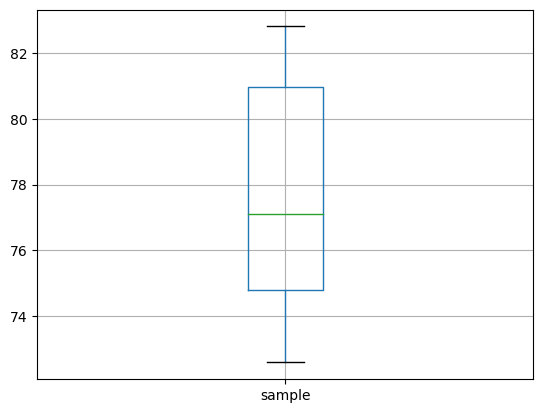

In [47]:
df = pd.DataFrame({'sample':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
df.boxplot(['sample'])

In [48]:
t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3), \
    t_result.pvalue.round(3)

In [49]:
print('1-Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value : {}'.format(p))

1-Sample t-test
t 통계량 : [0.864]
p-value : [0.41]


#### 2 sample t-test

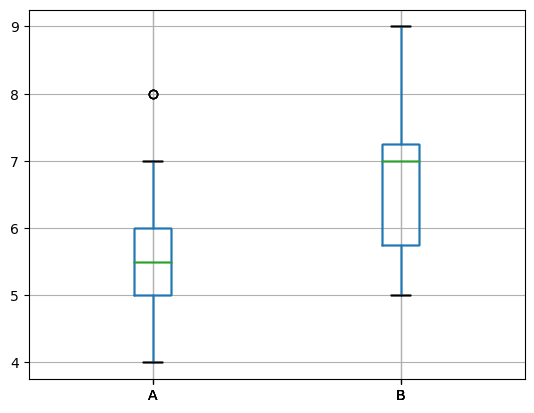

In [55]:
df = pd.DataFrame({'A' : [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7],
                 'B' : [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
df.boxplot(['A','B'])
plt.show()

In [57]:
# A 정규성 검정 
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.9094840288162231, p-value=0.06230909377336502,


In [58]:
# B 정규성 검정
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={},". format(statistic, p))

statistic=0.8978102207183838, p-value=0.03752618283033371,


In [60]:
# 등분산성 검정
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.21583926701185108, pvalue=0.642228641630704)

In [61]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'],df['B'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [62]:
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:-3.122
p:0.003


#### paired t-test

In [63]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

In [64]:
# t 검정
t_result = stats.ttest_rel(df1,df2)

In [65]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [67]:
print('Paired t-test')
print('t:{}'.format(t))
print('p:{}'.format(p))

Paired t-test
t:[-5.324]
p:[0.]


#### 1 proportion test

In [74]:
count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

In [76]:
print('1 proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 proportion test
z: 1.400
p: 0.161


#### 2 proportion test

In [81]:
count = np.array([4,1])
nobs = np.array([1000,1200])

stat, pval = proportions_ztest(count, nobs)

In [82]:
print('2 proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

2 proportion test
z: 1.553
p: 0.120


#### 카이제곱 검정

In [86]:
df = pd.DataFrame({'Work_1': [270,228,277], 'Work_2': [260,285,284],
                  'Work_3': [236,225,231], 'Work_4': [234,262,208]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi-square test
chisq: 13.366
p: 0.038
degree pf freedom: 6
expected value: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


#### ANOVA

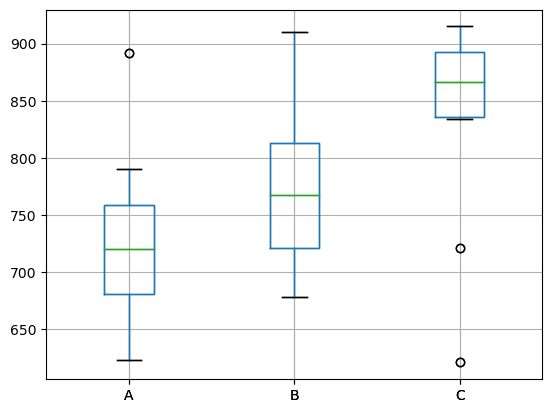

In [89]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                  'B':[721,821,910,678,723,790,711,790,745,891],
                  'C':[621,915,888,721,894,834,841,912,845,889]})
df.boxplot(['A','B','C'])
plt.show()

In [91]:
# ANOVA 실행
f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f, p = f_result.statistic.round(3),f_result.pvalue.round(3)

In [92]:
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

One-way
F 통계량 : 4.263
p-value : 0.025


#### 상관분석

In [94]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)

print('Correlation Analysis')
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:0.989
p-value:0.000
